In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import pandas_profiling as pp

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None)

df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df2 = df.copy()

In [7]:
df = df.fillna({'reviews_per_month':0})

In [8]:
df = df.drop(['id','name','host_id','host_name','last_review'],axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [10]:
X = df.drop(['price'], axis=1)
y = df['price']

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 3.7+ MB


In [12]:
def preprocess_quantiles(df):
    df['latitude'] = np.where(df['latitude']<40.6901,40.6901,df['latitude'])
    df['latitude'] = np.where(df['latitude']>40.763115,40.763115,df['latitude'])

    df['longitude'] = np.where(df['longitude']<-73.98307,-73.98307,df['longitude'])
    df['longitude'] = np.where(df['longitude']> -73.936275,-73.936275,df['longitude'])

    df['minimum_nights'] = np.where(df['minimum_nights'] < 1.0,1.0,df['minimum_nights'])
    df['minimum_nights'] = np.where(df['minimum_nights'] > 5.0,5.0,df['minimum_nights'])

    df['number_of_reviews'] = np.where(df['number_of_reviews'] < 1.0 , 1.0 , df['number_of_reviews'])
    df['number_of_reviews'] = np.where(df['number_of_reviews'] > 24.0 , 24.0 , df['number_of_reviews'])

    return df
X = preprocess_quantiles(X)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   minimum_nights                  48895 non-null  float64
 6   number_of_reviews               48895 non-null  float64
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.7+ MB


In [14]:
X.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
def log_transform_features(data):
    data.minimum_nights += 0.000000001
    data['minimum_nights'] = np.log10(data['minimum_nights'])
    data.number_of_reviews += 0.000000001
    data['number_of_reviews'] = np.log10(data['number_of_reviews'])
    data.reviews_per_month += 0.000000001
    data['reviews_per_month'] = np.log10(data['reviews_per_month'])
    data.calculated_host_listings_count += 0.000000001
    data['calculated_host_listings_count'] = np.log10(data['calculated_host_listings_count'])
    data.availability_365 += 0.000000001
    data['availability_365'] = np.log10(data['availability_365'])
    
    return data

#X_train = log_transform_features(X_train)

In [16]:
def recode_categorical(data):
    data_encoded = data.copy()
    data_encoded['minimum_nights'] = pd.qcut(data['minimum_nights'], q=2, labels=["minimum_nights_low", "minimum_nights_high"])
    data_encoded['number_of_reviews'] = pd.qcut(data['number_of_reviews'], q=3, labels=["number_of_reviews_low", "minimum_nights_medium", "number_of_reviews_high"])
    data_encoded['reviews_per_month'] = pd.qcut(data['reviews_per_month'], q=2, labels=["reviews_per_month_low", "reviews_per_month_high"])
    data_encoded['calculated_host_listings_count'] = pd.cut(data['calculated_host_listings_count'], 
                                                    bins=[0, 2, 327],
                                                    labels=["calculated_host_listings_count_low", "calculated_host_listings_count_high"])
    data_encoded['availability_365'] = pd.qcut(data['availability_365'], q=2, labels=["availability_low", "availability_high"])
    return data_encoded
X = recode_categorical(X)

In [17]:
from sklearn.preprocessing import RobustScaler

def scaling_and_one_hot(X_train):
    numeric_columns = ['latitude','longitude']
    categorical_cols = ['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']


    X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

    scaler = RobustScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train))
    return X_train

X = scaling_and_one_hot(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233
0,-0.451567,-0.356681,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.418422,-0.585350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.548468,0.294492,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.451567,-0.087193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [18]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.038689,-0.063991,0.411167,0.443011,0.115881,0.007629,0.000082,0.000429,0.001575,0.018407,0.000348,0.001432,0.002884,0.

In [19]:
X.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

def scoring(model, X_train, X_test, y_train, y_test):
    print('RMSE:', np.round(np.sqrt(mean_squared_error(y_test, model.predict(X_test))), 2))
    print('R2 score train:', np.round(r2_score(y_train, model.predict(X_train), multioutput='variance_weighted'), 2))
    print('R2 score test:', np.round(r2_score(y_test, model.predict(X_test), multioutput='variance_weighted'), 2))

scoring(lr, X_train, X_test, y_train, y_test)

RMSE: 218.63
R2 score train: 0.12
R2 score test: 0.13


In [23]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 300, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [24]:
scoring(rfr, X_train, X_test, y_train, y_test)

RMSE: 219.79
R2 score train: 0.33
R2 score test: 0.12


In [25]:
train = X_train
target = y_train
test = X_test
target_test = y_test

In [26]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [27]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [28]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [29]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model акщь Sklearn by different metrics   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [30]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 69.2773311   71.08644397 233.41600298 106.7682979  142.55711626]
acc(r2_score) for train = 11.74
acc(relative error) for train = 46.31
acc(rmse) for train = 22689.64
target_test = [225 649 300  26 125]
ytest = [538.62376665 330.10451006 163.31996416  89.78822588 136.14674639]
acc(r2_score) for test = 13.15
acc(relative error) for test = 46.58
acc(rmse) for test = 21863.18


In [31]:
# Support Vector Machines

svr = SVR()
svr.fit(train, target)
acc_model(1,svr,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 73.2591873   60.63132484 197.10815264  98.57169085 110.38899001]
acc(r2_score) for train = 7.64
acc(relative error) for train = 39.27
acc(rmse) for train = 23210.43
target_test = [225 649 300  26 125]
ytest = [210.66601887 220.08434032 134.17159606  64.89979485 109.99210115]
acc(r2_score) for test = 9.23
acc(relative error) for test = 39.63
acc(rmse) for test = 22351.19


In [32]:
# Linear SVR

linear_svr = LinearSVR()
linear_svr.fit(train, target)
acc_model(2,linear_svr,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 66.13177203  52.72273828 189.92269417  98.51502515 120.16409248]
acc(r2_score) for train = 7.47
acc(relative error) for train = 39.74
acc(rmse) for train = 23231.71
target_test = [225 649 300  26 125]
ytest = [244.24448374 218.13108823 139.91766366  66.10942901 119.52585905]
acc(r2_score) for test = 8.84
acc(relative error) for test = 40.04
acc(rmse) for test = 22399.1


In [91]:
# MLPRegressor

mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,10,3)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.01],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]
             }
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, 
                   cv=5, verbose=True, pre_dispatch='2*n_jobs')
mlp_GS.fit(train, target)
acc_model(3,mlp_GS,train,test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.8min finished


target =  [ 80  60  98  95 100]
ytrain =  [ 83.24116908  75.46431297 223.82931922 104.12834747 124.03337034]
acc(r2_score) for train = 12.37
acc(relative error) for train = 44.42
acc(rmse) for train = 22608.84
target_test = [225 649 300  26 125]
ytest = [508.97667633 363.85417104 143.97910578  82.86437772 134.28764516]
acc(r2_score) for test = 14.35
acc(relative error) for test = 44.74
acc(rmse) for test = 21711.88


In [34]:
# Stochastic Gradient Descent

sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(4,sgd,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 64.50996779  67.84446766 225.18331387 105.62201565 137.88967476]
acc(r2_score) for train = 11.53
acc(relative error) for train = 45.69
acc(rmse) for train = 22716.67
target_test = [225 649 300  26 125]
ytest = [512.05007352 313.66245908 155.45254726  89.40425728 138.32382484]
acc(r2_score) for test = 13.26
acc(relative error) for test = 45.86
acc(rmse) for test = 21849.09


In [35]:
# Decision Tree Regression

decision_tree = DecisionTreeRegressor()
decision_tree.fit(train, target)
acc_model(5,decision_tree,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 80.          55.5        216.94444444  95.         100.        ]
acc(r2_score) for train = 88.87
acc(relative error) for train = 5.44
acc(rmse) for train = 8056.93
target_test = [225 649 300  26 125]
ytest = [200.         250.         219.          52.72727273 114.66666667]
acc(r2_score) for test = -42.57
acc(relative error) for test = 57.04
acc(rmse) for test = 28012.32


In [36]:
# Random Forest

#random_forest = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators': [100, 1000]}, cv=5)
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
#print(random_forest.best_params_)
acc_model(6,random_forest,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 76.583       55.30566667 215.75274859  95.88       108.06      ]
acc(r2_score) for train = 77.12
acc(relative error) for train = 20.91
acc(rmse) for train = 11552.23
target_test = [225 649 300  26 125]
ytest = [467.34       716.37       218.25        52.60546554 117.29931317]
acc(r2_score) for test = -4.91
acc(relative error) for test = 49.21
acc(rmse) for test = 24029.28


In [37]:
xgb_clf = xgb.XGBRegressor({'objective': 'reg:squarederror'}) 
parameters = {'n_estimators': [60, 100, 120, 140], 
              'learning_rate': [0.01, 0.1],
              'max_depth': [5, 7],
              'reg_lambda': [0.5],
              'n_jobs' : [-1]
             }
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1).fit(train, target)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_boosting_model(7,xgb_reg,train,test)

[19:39:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score: 0.107
Best parameters set: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 60, 'n_jobs': -1, 'reg_lambda': 0.5}
target =  [ 80  60  98  95 100]
ytrain =  [ 80.86672   65.172615 260.60883  125.47973  146.31613 ]
acc(r2_score) for train = 27.77
acc(relative error) for train = 42.29
acc(rmse) for train = 20525.9
target_test = [225 649 300  26 125]
ytest = [1056.1013   307.36633  163.01418   83.30459  130.16095]
acc(r2_score) for test = 13.53
acc(relative error) for test = 43.96
acc(rmse) for test = 21815.54


In [38]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [39]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,        
    }
modelL = lgb.train(params, train_set = train_set, num_boost_round=10000,
                   early_stopping_rounds=8000,verbose_eval=500, valid_sets=valid_set)

Training until validation scores don't improve for 8000 rounds
[500]	valid_0's rmse: 217.785
[1000]	valid_0's rmse: 218.811
[1500]	valid_0's rmse: 219.384
[2000]	valid_0's rmse: 219.952
[2500]	valid_0's rmse: 220.609
[3000]	valid_0's rmse: 221.433
[3500]	valid_0's rmse: 221.985
[4000]	valid_0's rmse: 222.556
[4500]	valid_0's rmse: 223.152
[5000]	valid_0's rmse: 223.821
[5500]	valid_0's rmse: 224.363
[6000]	valid_0's rmse: 224.874
[6500]	valid_0's rmse: 225.265
[7000]	valid_0's rmse: 225.846
[7500]	valid_0's rmse: 226.138
[8000]	valid_0's rmse: 226.484
Early stopping, best iteration is:
[331]	valid_0's rmse: 217.421


In [40]:
acc_boosting_model(8,modelL,train,test,modelL.best_iteration)

target =  [ 80  60  98  95 100]
ytrain =  [ 93.90805429  78.83413755 243.1484859  125.50755432 423.26963958]
acc(r2_score) for train = 20.7
acc(relative error) for train = 43.66
acc(rmse) for train = 21506.94
target_test = [225 649 300  26 125]
ytest = [712.29767313 282.21485616 161.87771837  92.08239803 136.60352109]
acc(r2_score) for test = 13.77
acc(relative error) for test = 44.64
acc(rmse) for test = 21785.0


In [41]:
#fig =  plt.figure(figsize = (5,5))
#axes = fig.add_subplot(111)
lgb.plot_importance(modelL)
#gif_lgb_feat_importances = plt.gcf()
plt.show()

In [42]:
def hyperopt_gb_score(params):
    clf = GradientBoostingRegressor(**params)
    current_score = cross_val_score(clf, train, target, cv=5).mean()
    print(current_score, params)
    return current_score 
 
space_gb = {
            'n_estimators': hp.choice('n_estimators', range(100, 500, 100)),
            'max_depth': hp.choice('max_depth', np.arange(6, 8, 1, dtype=int))            
        }
 
best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.013779611408582793                                                                                                   
{'max_depth': 6, 'n_estimators': 400}                                                                                  
0.012348342365509236                                                                                                   
{'max_depth': 7, 'n_estimators': 200}                                                                                  
0.05115851312496145                                                                                                    
{'max_depth': 6, 'n_estimators': 200}                                                                                  
0.042077782271653284                                                                                                   
{'max_depth': 7, 'n_estimators': 100}                                                                                  
-0.004640374857193663                   

In [43]:
params = space_eval(space_gb, best)
params

{'max_depth': 7, 'n_estimators': 400}

In [44]:
# Gradient Boosting Regression

gradient_boosting = GradientBoostingRegressor(**params)
gradient_boosting.fit(train, target)
acc_model(9,gradient_boosting,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 80.65589236  64.31395176 242.86645676 102.09941116 124.17687463]
acc(r2_score) for train = 70.01
acc(relative error) for train = 34.05
acc(rmse) for train = 13225.87
target_test = [225 649 300  26 125]
ytest = [328.52445325 710.01977275 185.64926529  60.58085326 152.87761296]
acc(r2_score) for test = 3.43
acc(relative error) for test = 46.35
acc(rmse) for test = 23054.73


In [45]:
# Ridge Regressor

ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(10,ridge,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 69.15765058  69.87972147 231.82750861 109.19728732 143.71787063]
acc(r2_score) for train = 11.65
acc(relative error) for train = 46.25
acc(rmse) for train = 22701.93
target_test = [225 649 300  26 125]
ytest = [515.73734333 323.02683292 160.00695237  90.57212307 137.00688779]
acc(r2_score) for test = 13.27
acc(relative error) for test = 46.42
acc(rmse) for test = 21848.15


In [46]:
# Bagging Regressor

bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(11,bagging,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 77.32857143  52.98       207.85821018  93.8         96.6       ]
acc(r2_score) for train = 70.61
acc(relative error) for train = 22.39
acc(rmse) for train = 13092.96
target_test = [225 649 300  26 125]
ytest = [ 271.         1006.5         282.1          51.97951546  106.95302448]
acc(r2_score) for test = -8.85
acc(relative error) for test = 50.52
acc(rmse) for test = 24476.71


In [47]:
# Extra Trees Regressor

etr = ExtraTreesRegressor()
etr.fit(train, target)
acc_model(12,etr,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 80.          55.5        216.94444444  95.         100.        ]
acc(r2_score) for train = 88.87
acc(relative error) for train = 5.44
acc(rmse) for train = 8057.01
target_test = [225 649 300  26 125]
ytest = [270.25       292.8        247.68        52.72727273 114.66666667]
acc(r2_score) for test = -39.64
acc(relative error) for test = 53.22
acc(rmse) for test = 27723.03


In [48]:
# AdaBoost Regression

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(13,Ada_Boost,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [232.25436772 232.25436772 265.66591121 232.25436772 285.65936019]
acc(r2_score) for train = -18.88
acc(relative error) for train = 101.57
acc(rmse) for train = 26333.13
target_test = [225 649 300  26 125]
ytest = [805.06082063 265.66591121 285.65936019 232.25436772 285.65936019]
acc(r2_score) for test = -20.5
acc(relative error) for test = 101.53
acc(rmse) for test = 25753.2


In [49]:
Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg.fit(train, target)
acc_model(14,Voting_Reg,train,test)

target =  [ 80  60  98  95 100]
ytrain =  [ 67.54930678  67.24846079 232.00169433 107.87720374 142.76189835]
acc(r2_score) for train = 11.68
acc(relative error) for train = 46.06
acc(rmse) for train = 22697.95
target_test = [225 649 300  26 125]
ytest = [522.21265714 322.26694083 159.80828308  88.1897145  136.17315474]
acc(r2_score) for test = 13.27
acc(relative error) for test = 46.26
acc(rmse) for test = 21848.35


In [50]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Machines', 'Linear SVR', 
              'MLPRegressor', 'Stochastic Gradient Decent', 
              'Decision Tree Regressor', 'Random Forest',  'XGB', 'LGBM',
              'GradientBoostingRegressor', 'RidgeRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 
              'AdaBoostRegressor', 'VotingRegressor'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [51]:
pd.options.display.float_format = '{:,.2f}'.format

In [52]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
3,MLPRegressor,12.99,14.37,44.29,44.76,"22,528.43","21,709.67"
8,LGBM,20.70,13.77,43.66,44.64,"21,506.94","21,785.00"
7,XGB,27.77,13.53,42.29,43.96,"20,525.90","21,815.54"
14,VotingRegressor,11.68,13.27,46.06,46.26,"22,697.95","21,848.35"
10,RidgeRegressor,11.65,13.27,46.25,46.42,"22,701.93","21,848.15"
4,Stochastic Gradient Decent,11.53,13.26,45.69,45.86,"22,716.67","21,849.09"
0,Linear Regression,11.74,13.15,46.31,46.58,"22,689.64","21,863.18"
1,Support Vector Machines,7.64,9.23,39.27,39.63,"23,210.43","22,351.19"
2,Linear SVR,7.47,8.84,39.74,40.04,"23,231.71","22,399.10"
9,GradientBoostingRegressor,70.01,3.43,34.05,46.35,"13,225.87","23,054.73"


In [53]:
print('Prediction accuracy for models by relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Prediction accuracy for models by relative error - d_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
1,Support Vector Machines,7.64,9.23,39.27,39.63,"23,210.43","22,351.19"
2,Linear SVR,7.47,8.84,39.74,40.04,"23,231.71","22,399.10"
7,XGB,27.77,13.53,42.29,43.96,"20,525.90","21,815.54"
8,LGBM,20.70,13.77,43.66,44.64,"21,506.94","21,785.00"
3,MLPRegressor,12.99,14.37,44.29,44.76,"22,528.43","21,709.67"
4,Stochastic Gradient Decent,11.53,13.26,45.69,45.86,"22,716.67","21,849.09"
14,VotingRegressor,11.68,13.27,46.06,46.26,"22,697.95","21,848.35"
9,GradientBoostingRegressor,70.01,3.43,34.05,46.35,"13,225.87","23,054.73"
10,RidgeRegressor,11.65,13.27,46.25,46.42,"22,701.93","21,848.15"
0,Linear Regression,11.74,13.15,46.31,46.58,"22,689.64","21,863.18"


In [54]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


,Model,r2_train,r2_test,d_train,d_test,rmse_train,rmse_test
3,MLPRegressor,12.99,14.37,44.29,44.76,"22,528.43","21,709.67"
8,LGBM,20.70,13.77,43.66,44.64,"21,506.94","21,785.00"
7,XGB,27.77,13.53,42.29,43.96,"20,525.90","21,815.54"
10,RidgeRegressor,11.65,13.27,46.25,46.42,"22,701.93","21,848.15"
14,VotingRegressor,11.68,13.27,46.06,46.26,"22,697.95","21,848.35"
4,Stochastic Gradient Decent,11.53,13.26,45.69,45.86,"22,716.67","21,849.09"
0,Linear Regression,11.74,13.15,46.31,46.58,"22,689.64","21,863.18"
1,Support Vector Machines,7.64,9.23,39.27,39.63,"23,210.43","22,351.19"
2,Linear SVR,7.47,8.84,39.74,40.04,"23,231.71","22,399.10"
9,GradientBoostingRegressor,70.01,3.43,34.05,46.35,"13,225.87","23,054.73"


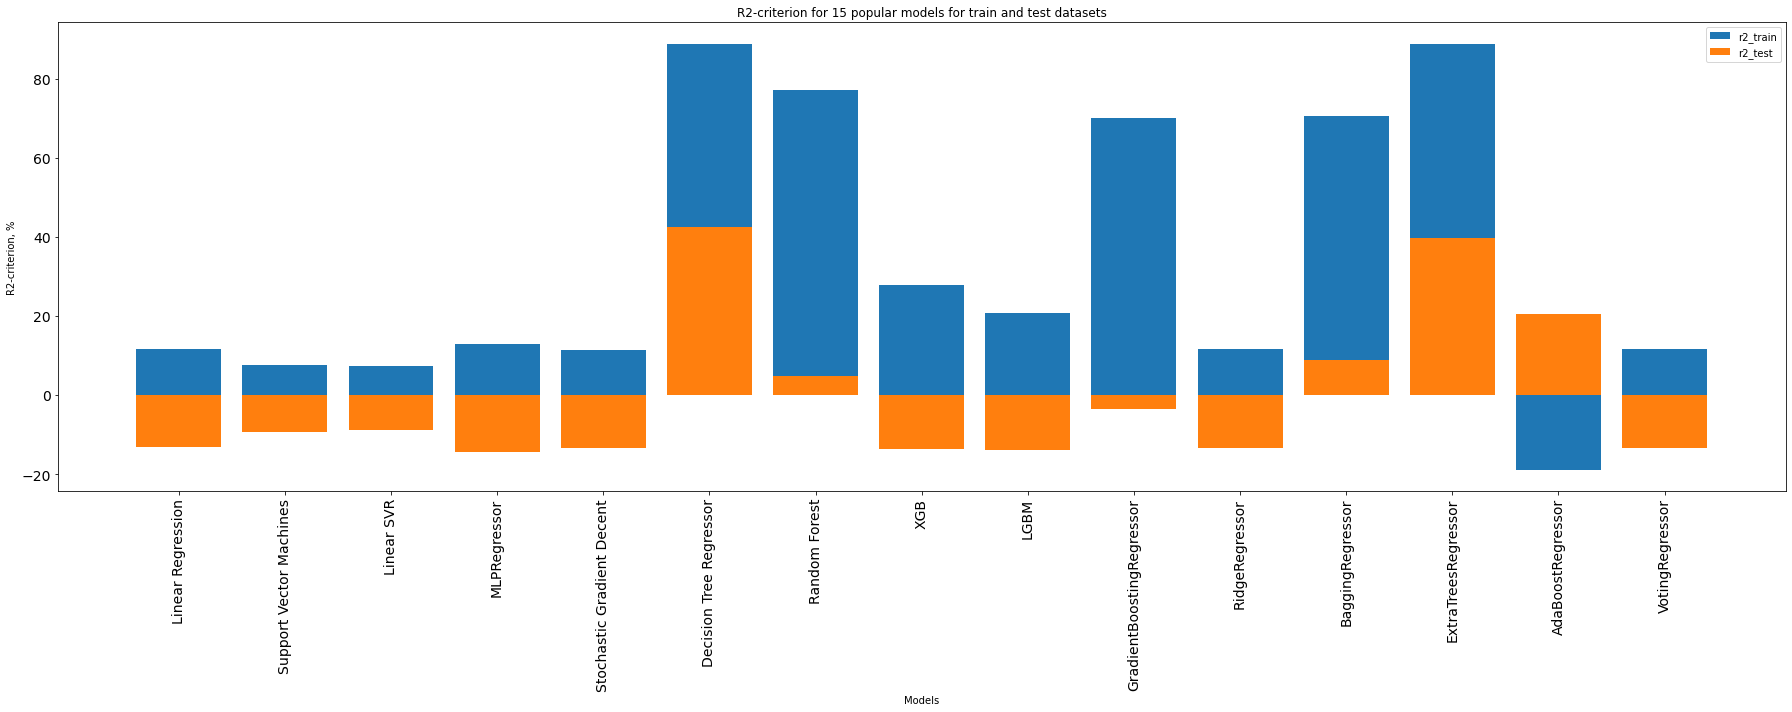

In [55]:
# Plot
%matplotlib inline
plt.figure(figsize=[25,10])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.bar(xx, models['r2_train'], label = 'r2_train')
plt.bar(xx, -1*models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.tight_layout()
fig_rmse = plt.gcf()
plt.show()
fig_rmse.savefig('graph_r2_score.png')

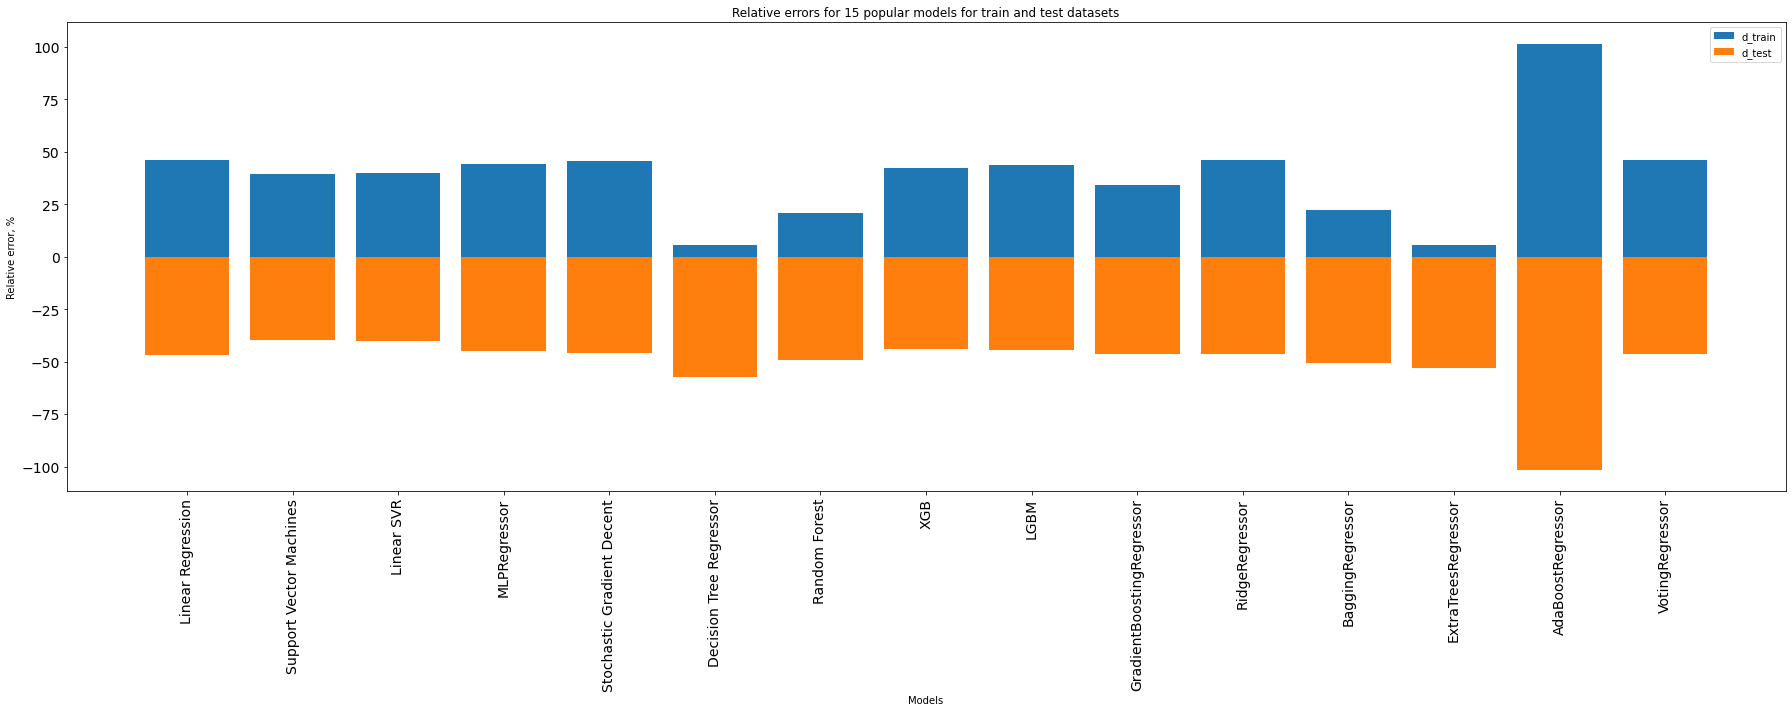

In [56]:
# Plot
plt.figure(figsize=[25,10])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.bar(xx, models['d_train'], label = 'd_train')
plt.bar(xx, -1*models['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx, rotation='vertical')
plt.tight_layout()
fig_rmse = plt.gcf()
plt.show()
fig_rmse.savefig('graph_relative_errors.png')

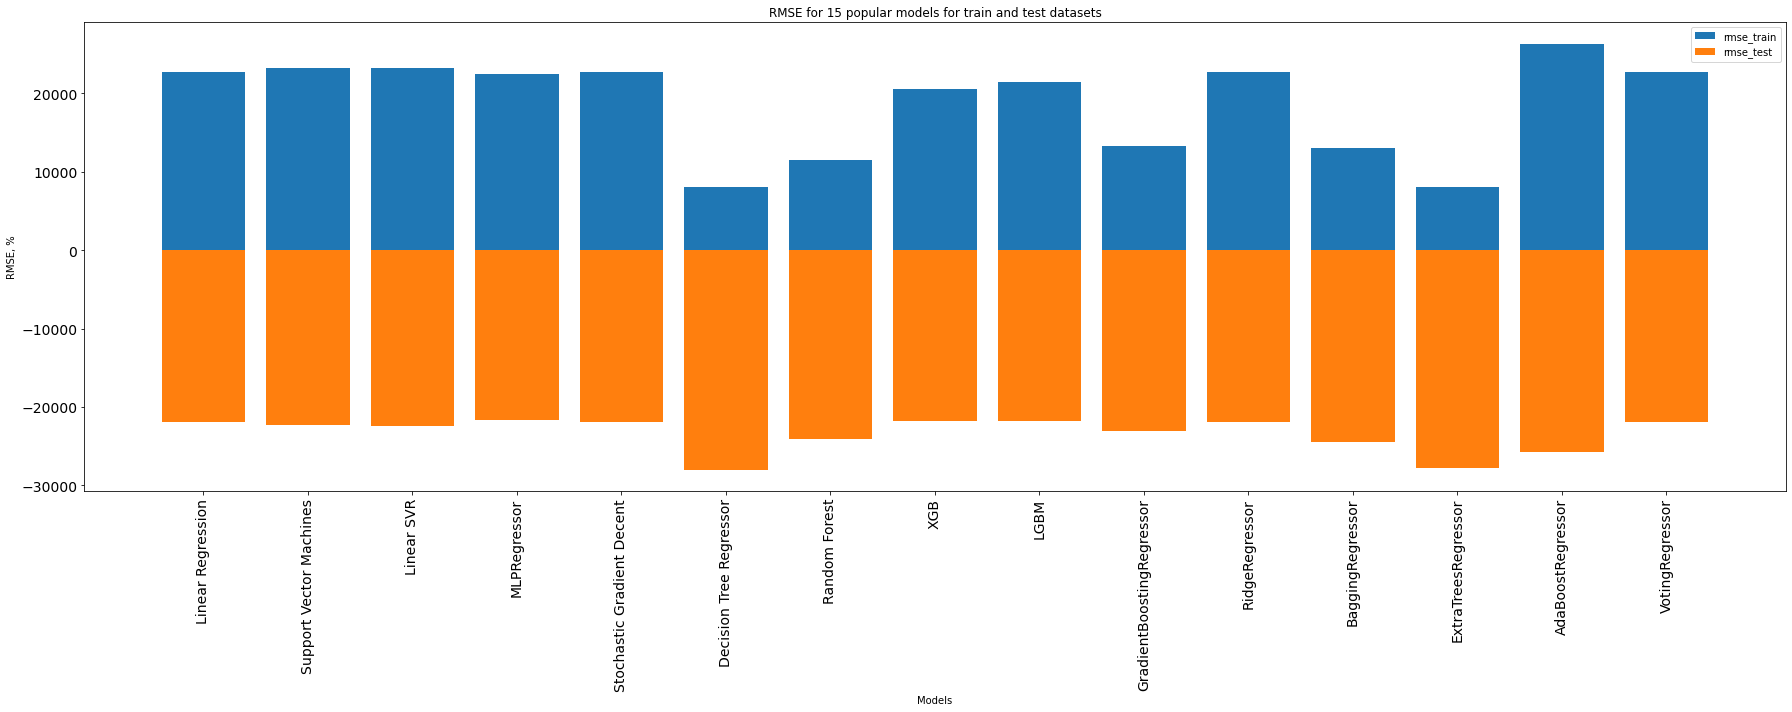

In [57]:
# Plot
plt.figure(figsize=[25,10])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.bar(xx, models['rmse_train'], label = 'rmse_train')
plt.bar(xx, -1*models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.tight_layout()
fig_rmse = plt.gcf()
plt.show()
fig_rmse.savefig('graph_rmse.png')

In [58]:
df = pd.DataFrame()
df['Borough'] = df2['name']
df['Neighbourhood'] = df2['neighbourhood']
df['latitude'] = df2['latitude']
df['longitude'] = df2['longitude']

In [59]:
import requests

In [60]:
df = df.drop_duplicates(subset='Neighbourhood', keep='first')
df = df.head(1000)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 34161
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Borough        221 non-null    object 
 1   Neighbourhood  221 non-null    object 
 2   latitude       221 non-null    float64
 3   longitude      221 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.6+ KB


In [61]:
# plot on folium the neighborhoods of London, importing the libraries
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
# commenting off since it's already completed
import folium # map rendering library

In [62]:
latitude = df['latitude'][0]
longitude = df['longitude'][0]

# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['latitude'], df['longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [63]:
CLIENT_ID = '3JB1PNOILKSRSSHZX4NXBFYTRMJD3ADPIDUZABKWLUTXKC3T'
CLIENT_SECRET = 'VTXFM3UHONDKA4IZXHUQYZXV5VTFY4WMWFWPDWPIS4QEKRKW'
VERSION = '20180605'

In [64]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            continue
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [65]:
nyc_venues = getNearbyVenues(names=df['Neighbourhood'],latitudes=df['latitude'],longitudes=df['longitude'])

nyc_venues.head()

Kensington
Midtown
Harlem
Clinton Hill
East Harlem
Murray Hill
Bedford-Stuyvesant
Hell's Kitchen
Upper West Side
Chinatown
South Slope
West Village
Williamsburg
Fort Greene
Chelsea
Crown Heights
Park Slope
Windsor Terrace
Inwood
East Village
Greenpoint
Bushwick
Flatbush
Lower East Side
Prospect-Lefferts Gardens
Long Island City
Kips Bay
SoHo
Upper East Side
Prospect Heights
Washington Heights
Woodside
Brooklyn Heights
Carroll Gardens
Gowanus
Flatlands
Cobble Hill
Flushing
Boerum Hill
Sunnyside
DUMBO
St. George
Highbridge
Financial District
Ridgewood
Morningside Heights
Jamaica
Middle Village
NoHo
Ditmars Steinway
Flatiron District
Roosevelt Island
Greenwich Village
Little Italy
East Flatbush
Tompkinsville
Astoria
Clason Point
Eastchester
Kingsbridge
Two Bridges
Queens Village
Rockaway Beach
Forest Hills
Nolita
Woodlawn
University Heights
Gravesend
Gramercy
Allerton
East New York
Theater District
Concourse Village
Sheepshead Bay
Emerson Hill
Fort Hamilton
Bensonhurst
Tribeca
Shore Acres

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kensington,40.65,-73.97,Der Pioneer,40.65,-73.97,Bakery
1,Kensington,40.65,-73.97,Wheated,40.65,-73.97,Pizza Place
2,Kensington,40.65,-73.97,Hinterlands Bar,40.65,-73.97,Dive Bar
3,Kensington,40.65,-73.97,Parade Café,40.65,-73.97,Café
4,Kensington,40.65,-73.97,La Loba Cantina,40.65,-73.97,Mexican Restaurant


In [66]:
nyc_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Allerton,21,21,21,21,21,21
Arden Heights,5,5,5,5,5,5
Arrochar,24,24,24,24,24,24
Astoria,40,40,40,40,40,40
Bath Beach,23,23,23,23,23,23
Battery Park City,100,100,100,100,100,100
Bay Ridge,28,28,28,28,28,28
Bay Terrace,7,7,7,7,7,7
"Bay Terrace, Staten Island",15,15,15,15,15,15


In [67]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 392 uniques categories.


In [68]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Neighbourhood'] = nyc_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Gym,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Internet Cafe,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Peking Duck Restaurant,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Ser

In [69]:
nyc_onehot.shape

(7622, 393)

In [70]:
nyc_grouped = nyc_onehot.groupby('Neighbourhood').mean().reset_index()
nyc_grouped.head()

,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Gym,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Internet Cafe,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Peking Duck Restaurant,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Ser

In [71]:
num_top_venues = 10

for hood in nyc_grouped['Neighbourhood']:
    #print("----"+hood+"----")
    temp = nyc_grouped[nyc_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [73]:
import numpy as np # library to handle data in a vectorized manner

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = nyc_grouped['Neighbourhood']

for ind in np.arange(nyc_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Deli / Bodega,Chinese Restaurant,Breakfast Spot,Fried Chicken Joint,Gas Station,Spanish Restaurant,Spa,Fast Food Restaurant,Martial Arts School
1,Arden Heights,Basketball Court,Nightclub,Diner,Pool,Asian Restaurant,Zoo Exhibit,Fishing Spot,Falafel Restaurant,Farm,Farmers Market
2,Arrochar,Baseball Field,Beach,Liquor Store,Supermarket,Sandwich Place,Bus Stop,Taco Place,Middle Eastern Restaurant,Mediterranean Restaurant,Martial Arts School
3,Astoria,Deli / Bodega,Discount Store,Pizza Place,Coffee Shop,Pharmacy,Taco Place,Grocery Store,Mexican Restaurant,Gym / Fitness Center,Sushi Restaurant
4,Bath Beach,Pizza Place,Pharmacy,Italian Restaurant,Steakhouse,Baseball Field,Liquor Store,Gymnastics Gym,Gym / Fitness Center,Mexican Restaurant,Gas Station


In [74]:
neighbourhoods_venues_sorted.shape

(220, 11)

In [75]:
nyc_grouped.head()

,Neighbourhood,Accessories Store,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Gym,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Internet Cafe,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Peking Duck Restaurant,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Ser

In [76]:
from sklearn.cluster import KMeans

In [77]:
# set number of clusters
kclusters = 5

nyc_grouped_clustering = nyc_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nyc_merged = df

In [78]:
nyc_merged.head()

,Borough,Neighbourhood,latitude,longitude
0,Clean & quiet apt home by the park,Kensington,40.65,-73.97
1,Skylit Midtown Castle,Midtown,40.75,-73.98
2,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,40.81,-73.94
3,Cozy Entire Floor of Brownstone,Clinton Hill,40.69,-73.96
4,Entire Apt: Spacious Studio/Loft by central park,East Harlem,40.80,-73.94


In [79]:
neighbourhoods_venues_sorted.head()

,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Allerton,Pizza Place,Deli / Bodega,Chinese Restaurant,Breakfast Spot,Fried Chicken Joint,Gas Station,Spanish Restaurant,Spa,Fast Food Restaurant,Martial Arts School
1,0,Arden Heights,Basketball Court,Nightclub,Diner,Pool,Asian Restaurant,Zoo Exhibit,Fishing Spot,Falafel Restaurant,Farm,Farmers Market
2,0,Arrochar,Baseball Field,Beach,Liquor Store,Supermarket,Sandwich Place,Bus Stop,Taco Place,Middle Eastern Restaurant,Mediterranean Restaurant,Martial Arts School
3,2,Astoria,Deli / Bodega,Discount Store,Pizza Place,Coffee Shop,Pharmacy,Taco Place,Grocery Store,Mexican Restaurant,Gym / Fitness Center,Sushi Restaurant
4,0,Bath Beach,Pizza Place,Pharmacy,Italian Restaurant,Steakhouse,Baseball Field,Liquor Store,Gymnastics Gym,Gym / Fitness Center,Mexican Restaurant,Gas Station


In [80]:

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
nyc_merged.dropna(inplace=True)
nyc_merged.shape # check the last columns!
# nyc_merged.head(50)
nyc_merged[['Neighbourhood','latitude','longitude','Cluster Labels']]

,Neighbourhood,latitude,longitude,Cluster Labels
0,Kensington,40.65,-73.97,0.00
1,Midtown,40.75,-73.98,0.00
2,Harlem,40.81,-73.94,0.00
3,Clinton Hill,40.69,-73.96,0.00
4,East Harlem,40.80,-73.94,0.00
5,Murray Hill,40.75,-73.97,0.00
6,Bedford-Stuyvesant,40.69,-73.96,0.00
7,Hell's Kitchen,40.76,-73.98,0.00
8,Upper West Side,40.80,-73.97,0.00
9,Chinatown,40.71,-73.99,0.00


In [81]:
nyc_merged['Cluster Labels'] = nyc_merged['Cluster Labels'].astype(int)

In [82]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['latitude'], nyc_merged['longitude'], nyc_merged['Neighbourhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [83]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kensington,Coffee Shop,Convenience Store,Pizza Place,Park,Thai Restaurant,Grocery Store,Indian Restaurant,Gas Station,Bakery,Mexican Restaurant
1,Midtown,Hotel,Coffee Shop,Bakery,Sandwich Place,Theater,Café,Clothing Store,Cuban Restaurant,Steakhouse,Gym / Fitness Center
2,Harlem,Southern / Soul Food Restaurant,Burger Joint,Cosmetics Shop,Mobile Phone Shop,Seafood Restaurant,Pizza Place,Sushi Restaurant,Donut Shop,Grocery Store,Café
3,Clinton Hill,Bar,Wine Shop,Pizza Place,Grocery Store,Deli / Bodega,Cocktail Bar,Coffee Shop,Mexican Restaurant,Asian Restaurant,Café
4,East Harlem,Mexican Restaurant,Deli / Bodega,Pizza Place,Bakery,Italian Restaurant,Chinese Restaurant,Cosmetics Shop,Sandwich Place,Coffee Shop,Gym
5,Murray Hill,Coffee Shop,Park,Café,Mexican Restaurant,American Restaurant,Bagel Shop,Burger Joint,Japanese Restaurant,Deli / Bodega,Bar
6,Bedford-Stuyvesant,Coffee Shop,Bar,Wine Shop,Juice Bar,Health & Beauty Service,Pizza Place,Taco Place,Street Art,Gym / Fitness Center,Grocery Store
7,Hell's Kitchen,Theater,Mexican Restaurant,Coffee Shop,Gym,Italian Restaurant,Wine Bar,Pizza Place,Japanese Restaurant,Burger Joint,Bar
8,Upper West Side,Coffee Shop,Pizza Place,Mexican Restaurant,American Restaurant,Burger Joint,Deli / Bodega,Bar,Chinese Restaurant,Grocery Store,Indian Restaurant
9,Chinatown,Chinese Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Bar,Cocktail Bar,Spanish Restaurant,Coffee Shop,Sandwich Place,Tea Room,Dessert Shop


In [84]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5993,Belle Harbor,Beach,Park,Zoo Exhibit,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant
9986,Neponsit,Beach,Park,Zoo Exhibit,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant
33698,Breezy Point,Beach,Park,Zoo Exhibit,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant


In [85]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
196,Jamaica,Bus Stop,Train Station,Sandwich Place,Chinese Restaurant,Pet Store,Pharmacy,Pizza Place,Donut Shop,Market,Deli / Bodega
246,East Flatbush,Pizza Place,Food Truck,Music Venue,Ice Cream Shop,Food,Salon / Barbershop,Grocery Store,Zoo Exhibit,Filipino Restaurant,Event Space
249,Tompkinsville,Sri Lankan Restaurant,Deli / Bodega,Convenience Store,Indian Restaurant,Pizza Place,Bus Stop,Zoo Exhibit,Fish & Chips Shop,Exhibit,Factory
257,Astoria,Deli / Bodega,Discount Store,Pizza Place,Coffee Shop,Pharmacy,Taco Place,Grocery Store,Mexican Restaurant,Gym / Fitness Center,Sushi Restaurant
309,Kingsbridge,Pizza Place,Bus Station,Mexican Restaurant,Deli / Bodega,Latin American Restaurant,Chinese Restaurant,Park,Spanish Restaurant,Café,Lake
433,Woodlawn,Deli / Bodega,Pub,Italian Restaurant,Pizza Place,Laundromat,Cosmetics Shop,Donut Shop,Pharmacy,Food & Drink Shop,Grocery Store
510,Allerton,Pizza Place,Deli / Bodega,Chinese Restaurant,Breakfast Spot,Fried Chicken Joint,Gas Station,Spanish Restaurant,Spa,Fast Food Restaurant,Martial Arts School
571,Emerson Hill,Italian Restaurant,Sandwich Place,Bus Stop,Park,Chinese Restaurant,Bagel Shop,Pizza Place,Brewery,Diner,Dance Studio
598,Shore Acres,Italian Restaurant,Bar,Deli / Bodega,Bus Stop,Intersection,Furniture / Home Store,Bagel Shop,Restaurant,Cosmetics Shop,Pizza Place
694,Cypress Hills,Deli / Bodega,Pizza Place,Sandwich Place,Southern / Soul Food Restaurant,Gym,Grocery Store,Liquor Store,Big Box Store,Bakery,Pharmacy


In [86]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15430,Bergen Beach,Miscellaneous Shop,American Restaurant,Gym,Bus Station,Zoo Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
21847,Huguenot,Gym,Business Service,Zoo Exhibit,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant


In [87]:
nyc_merged_cluster_5 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]
nyc_merged_cluster_5

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1070,Canarsie,Harbor / Marina,Athletics & Sports,Skate Park,Gym / Fitness Center,Food,Business Service,Fish & Chips Shop,Factory,Falafel Restaurant,Farm
10710,Throgs Neck,Harbor / Marina,Park,Seafood Restaurant,Zoo Exhibit,Financial or Legal Service,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market


In [88]:
nyc_grouped_busstoped = nyc_grouped.sort_values(by='Bus Stop',ascending=False)
nyc_grouped_busstoped[['Neighbourhood','Bus Stop']].head()

,Neighbourhood,Bus Stop
214,Willowbrook,0.33
81,Fort Wadsworth,0.20
176,Silver Lake,0.20
104,Jamaica,0.18
119,Manhattan Beach,0.17


In [89]:
nyc_grouped_busstoped = nyc_grouped.sort_values(by='Train Station',ascending=False)
nyc_grouped_busstoped[['Neighbourhood','Train Station']].head()

,Neighbourhood,Train Station
184,St. Albans,0.11
183,Spuyten Duyvil,0.10
104,Jamaica,0.09
140,New Dorp,0.05
217,Woodlawn,0.05


In [90]:
nyc_merged_cluster_5[['Neighbourhood',
                         '1st Most Common Venue',
                         '2nd Most Common Venue',
                         '3rd Most Common Venue',
                         '4th Most Common Venue',
                         '5th Most Common Venue',
                         '6th Most Common Venue',
                         '7th Most Common Venue',
                         '8th Most Common Venue',
                         '9th Most Common Venue',
                         '10th Most Common Venue']]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1070,Canarsie,Harbor / Marina,Athletics & Sports,Skate Park,Gym / Fitness Center,Food,Business Service,Fish & Chips Shop,Factory,Falafel Restaurant,Farm
10710,Throgs Neck,Harbor / Marina,Park,Seafood Restaurant,Zoo Exhibit,Financial or Legal Service,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market
